In [0]:
pip install nltk

Python interpreter will be restarted.
  Using cached nltk-3.7-py3-none-any.whl (1.5 MB)
  Using cached tqdm-4.62.3-py2.py3-none-any.whl (76 kB)
  Using cached click-8.0.3-py3-none-any.whl (97 kB)
  Using cached regex-2022.1.18-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (764 kB)
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-337fc91d-9e04-435d-a1fc-8a5155197197/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.


In [0]:
pip install networkx

Python interpreter will be restarted.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-337fc91d-9e04-435d-a1fc-8a5155197197/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.


In [0]:
pip install wordcloud

Python interpreter will be restarted.
  Using cached wordcloud-1.8.1-cp38-cp38-manylinux1_x86_64.whl (371 kB)
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-337fc91d-9e04-435d-a1fc-8a5155197197/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.


In [0]:
import nltk
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [0]:
DF = (spark.read
      .option("inferSchema", True).json("/FileStore/tables/Project_Data_Extract/Reviews_Final_Dashboard.json"))
spark.conf.set("spark.sql.execution.arrow.enabled", "false") 
Reviews_pdf=DF.toPandas()
Reviews_pdf

,Aspect,Aspect_AMBIENCE_GENERAL,Aspect_DRINKS_PRICES,Aspect_DRINKS_STYLE_OPTIONS,Aspect_FOOD_PRICES,Aspect_FOOD_QUALITY,Aspect_FOOD_STYLE_OPTIONS,Aspect_Keywords,Aspect_LOCATION_GENERAL,Aspect_RESTAURANT_GENERAL,...,sentiment_positive,sentiment_score,stars,stars_1,stars_2,stars_3,stars_4,stars_5,text_syntatics_cleaned,useful
0,"[FOOD#QUALITY, RESTAURANT#GENERAL, FOOD#QUALIT...",0,0,0,0,3,0,"[grubhub order sent chopstick soy sauce, would...",0,3,...,0,-0.7506,1,1,0,0,0,0,ordered grubhubstaying hotel indicated order s...,0
1,"[RESTAURANT#GENERAL, RESTAURANT#GENERAL, AMBIE...",1,0,0,0,1,0,"[pleasant surprise, burn time, planned great a...",0,3,...,1,0.9694,5,0,0,0,0,1,pleasant surprise whatever stopped ra burn tim...,0
2,"[SERVICE#GENERAL, RESTAURANT#GENERAL, RESTAURA...",0,0,0,0,3,0,"[always super, clean come time, always good, e...",0,6,...,1,0.9842,5,0,0,0,0,1,love place atmosphere nice always super clean ...,0
3,"[RESTAURANT#GENERAL, FOOD#QUALITY, FOOD#QUALITY]",0,0,0,0,2,0,"[avocadofresh rice, loose small, portion roll ...",0,1,...,0,0.0000,1,1,0,0,0,0,fish avocadofresh riceloose small portion roll...,1
4,"[RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURA...",0,0,0,0,1,0,"[experience meal, card split bill couple minut...",0,9,...,1,0.6249,2,0,1,0,0,0,girlfriend came two week ago quite experience ...,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,"[FOOD#QUALITY, FOOD#STYLE_OPTIONS, FOOD#QUALIT...",0,0,0,0,4,1,"[roll goyoza oz rice, tiny roll, taste old man...",0,2,...,0,-0.7514,1,1,0,0,0,0,terrible ordered roll goyoza oz rice got tiny ...,0
437,"[RESTAURANT#GENERAL, RESTAURANT#GENERAL, FOOD#...",1,0,0,0,1,0,"[least time, must say, sushi ok host, rude ser...",0,5,...,1,0.3535,2,0,1,0,0,0,whatever least time must say sushi ok host sta...,0
438,"[SERVICE#GENERAL, SERVICE#GENERAL, SERVICE#GEN...",1,0,0,0,2,0,"[table reservation, minute service, server nev...",0,3,...,0,-0.5118,2,0,1,0,0,0,whatever sorry_about_that table reservation wa...,0
439,"[RESTAURANT#GENERAL, FOOD#QUALITY, RESTAURANT#...",0,0,0,0,2,0,"[place dozen time, really great, experience gr...",0,5,...,1,0.8856,5,0,0,0,0,1,I visited place dozen time past year I really ...,0


In [0]:
import nltk
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def word_association_graph(text):
    nouns_in_text = []
    is_noun = lambda pos: pos[:2] == 'NN'
    for sent in text.split('.')[:-1]:   
        tokenized = nltk.word_tokenize(sent)
        nouns=[word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)]
        nouns_in_text.append(' '.join([word for word in nouns if not (word=='' or len(word)==1)]))

    nouns_list = []
    

    for sent in nouns_in_text:
        temp = sent.split(' ')
        for word in temp:
            if word not in nouns_list:
                nouns_list.append(word)

    df = pd.DataFrame(np.zeros(shape=(len(nouns_list),2)), columns=['Nouns', 'Verbs & Adjectives'])
    df['Nouns'] = nouns_list

    is_adjective_or_verb = lambda pos: pos[:2]=='JJ' or pos[:2]=='VB'
    for sent in text.split('.'):
        for noun in nouns_list:
            if noun in sent:
                tokenized = nltk.word_tokenize(sent)
                adjectives_or_verbs = [word for (word, pos) in nltk.pos_tag(tokenized) if is_adjective_or_verb(pos)]
                ind = df[df['Nouns']==noun].index[0]
                df['Verbs & Adjectives'][ind]=adjectives_or_verbs

    fig = plt.figure(figsize=(30,20))
    G = nx.Graph()

    for i in range(len(df)):
        G.add_node(df['Nouns'][i])
        for word in df['Verbs & Adjectives'][i]:
            G.add_edges_from([(df['Nouns'][i], word)])

    pos = nx.spring_layout(G,k=0.5)
    nx.draw(G, pos, with_labels=True, font_size=20)
    plt.show() 

<command-1684511256259441>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Verbs & Adjectives'][ind]=adjectives_or_verbs
/databricks/python/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


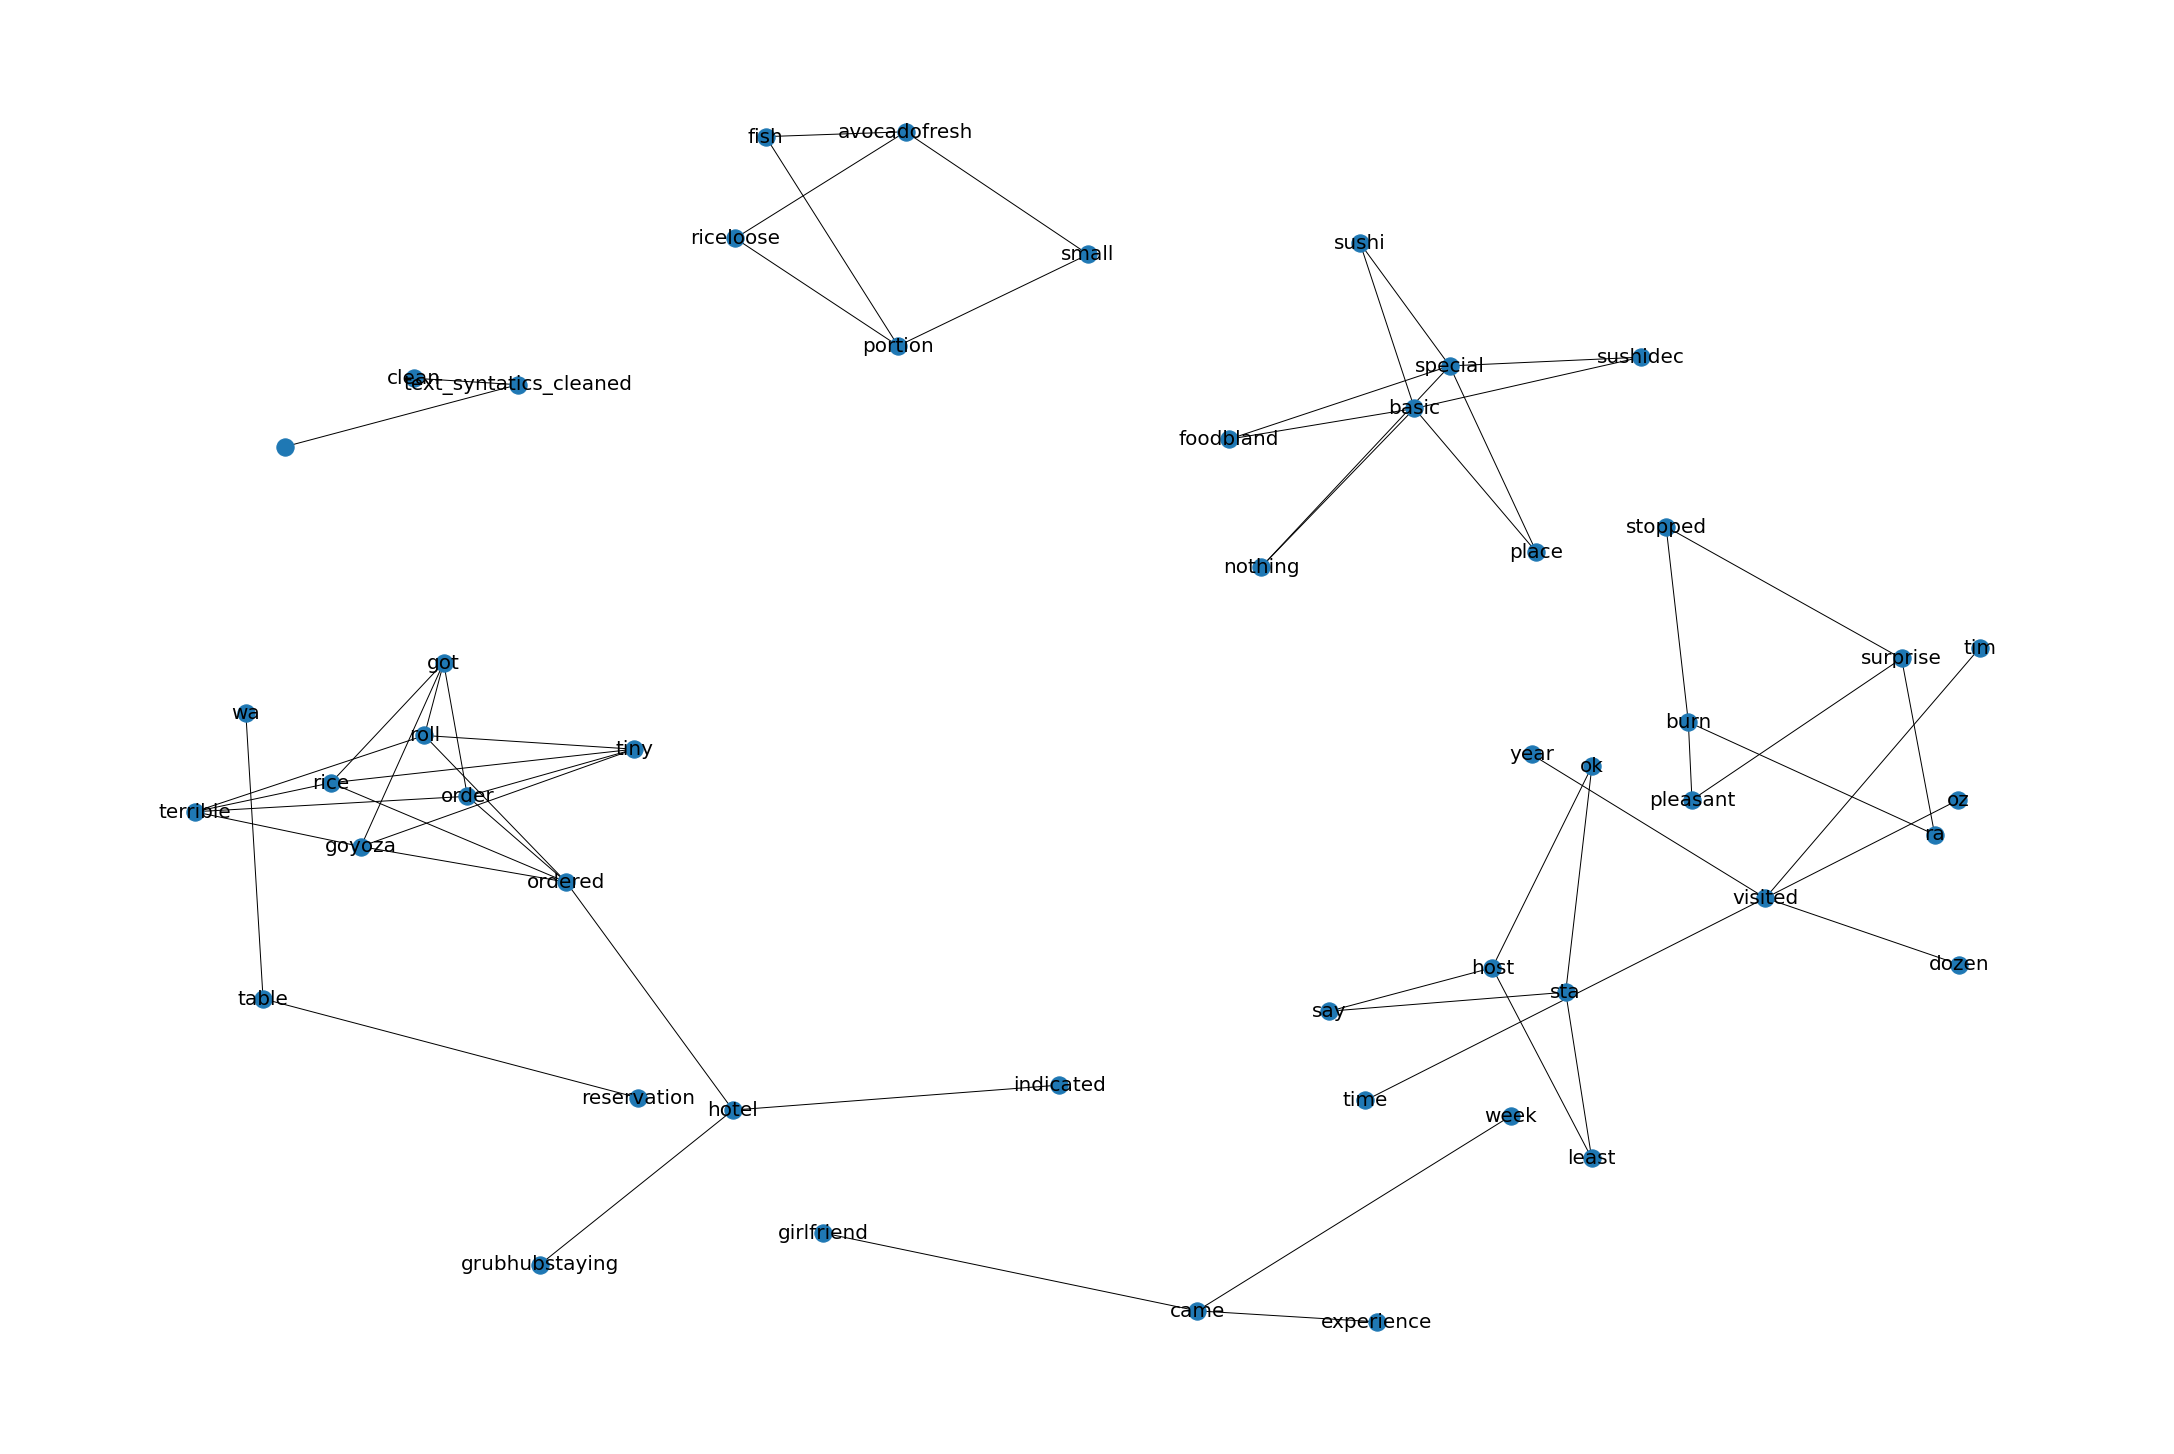

In [0]:
import re
text = str(Reviews_pdf['text_syntatics_cleaned'])
text = re.sub("[\[].*?[\]]", "", text) # Do more processing (like lemmatization, stemming, etc if you want)
word_association_graph(text)

In [0]:
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, font_size=20)
plt.show() 

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
<command-1684511256259436> in <module>
----> 1 pos = nx.spring_layout(G, k=0.5)
      2 nx.draw(G, pos, with_labels=True, font_size=20)
      3 plt.show()

NameError: name 'G' is not defined

In [0]:
pip install gensim==3.8.3

Python interpreter will be restarted.
  Using cached gensim-3.8.3-cp38-cp38-manylinux1_x86_64.whl (24.2 MB)
  Attempting uninstall: gensim
    Found existing installation: gensim 4.1.2
    Uninstalling gensim-4.1.2:
      Successfully uninstalled gensim-4.1.2
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-715fd06a-fca0-441b-8cb8-06929f6aea10/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.


In [0]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['text_syntatics_cleaned']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus

corpus = build_corpus(Reviews_pdf)        
corpus[0:2]

Out[3]: [['ordered',
  'grubhubstaying',
  'hotel',
  'indicated',
  'order',
  'sent',
  'chopstick',
  'soy',
  'sauce',
  'would',
  'give',
  'refund',
  'total',
  'waste',
  'time',
  'money',
  'avoid',
  'place',
  'threw',
  'away',
  'frozen',
  'burrito',
  'lobby',
  'freezerbetter',
  'mess'],
 ['pleasant',
  'surprise',
  'whatever',
  'stopped',
  'ra',
  'burn',
  'time',
  'ended',
  'staying',
  'longer',
  'planned',
  'great',
  'atmosphere',
  'lisawesome',
  'bartender',
  'super',
  'hard',
  'workersuper',
  'friendly',
  'thanks']]

In [0]:
model = word2vec.Word2Vec(corpus,
                          window=20, min_count=200, workers=4)
model.wv['service']

Out[4]: array([ 8.2084717e-04, -6.3149687e-03, -8.5059139e-05, -3.5001840e-03,
        4.0996606e-03,  4.6168142e-03,  1.0437383e-03, -5.5907341e-03,
       -2.5001480e-03,  2.5577345e-03,  4.6219062e-03,  5.2361707e-03,
       -3.4360434e-03, -5.6863660e-03, -2.0184943e-04, -1.9602245e-03,
        1.2355134e-03,  2.8649569e-03,  1.6739521e-03, -1.6218316e-03,
       -6.6806036e-03,  2.3359705e-03, -5.4998328e-03, -8.8212610e-04,
        3.8122153e-04, -2.7956229e-03,  3.9936253e-03,  2.1602039e-03,
       -3.8532999e-03, -4.3568789e-04, -6.5990369e-04, -7.3288759e-04,
        1.3406142e-03, -4.1808831e-03,  5.7767169e-04, -5.5599795e-04,
       -4.7533819e-03,  4.0281611e-03, -1.3443317e-04,  4.7015006e-04,
        5.1705497e-03,  3.6982729e-03, -3.2461968e-03,  3.3262603e-03,
        5.4827235e-03, -6.2247040e-04, -2.8293822e-03,  2.1200967e-03,
       -1.4824213e-03,  9.4538025e-04,  1.8906302e-03,  1.3378228e-03,
        5.4772012e-03, -8.2838431e-04, -5.5277213e-03, -7.6379017e-03

In [0]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

<command-1684511256259449>:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])


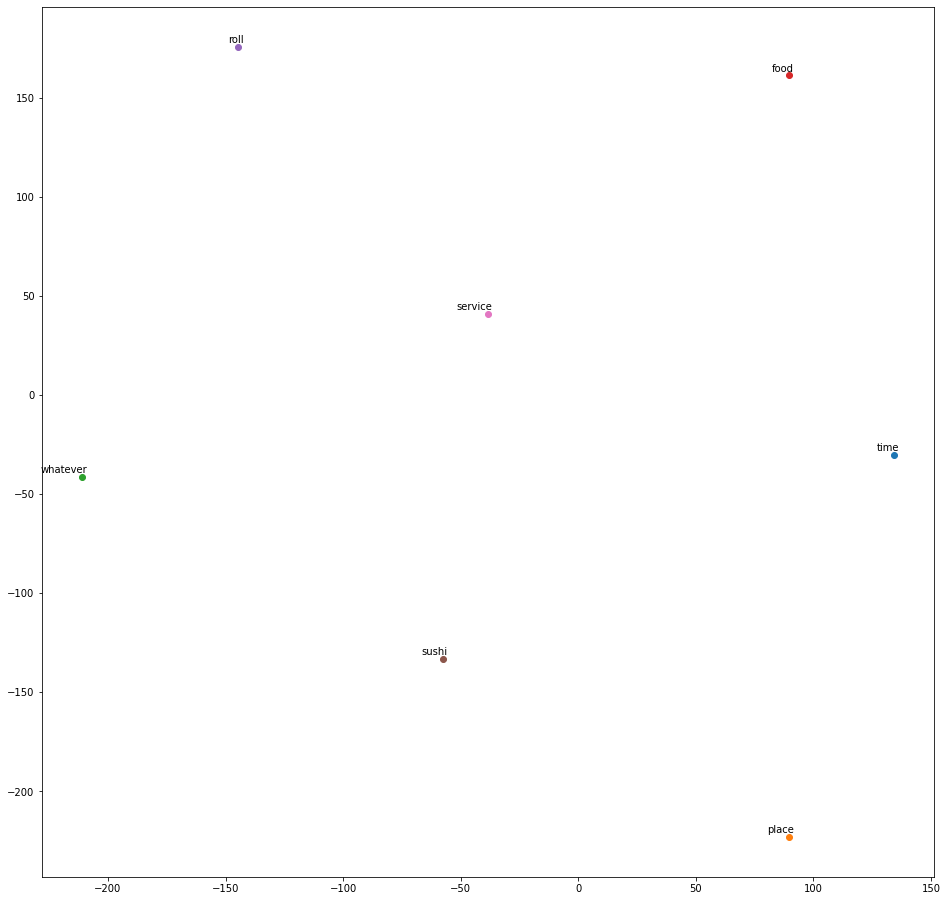

In [0]:
tsne_plot(model)